In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("dataset2.csv")
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,37.470001,38.740002,37.410000,38.590000,32.781559,5537100
1,2019-01-03,38.959999,39.060001,38.480000,38.810001,32.968441,7137300
2,2019-01-04,39.570000,40.080002,39.419998,40.029999,34.004814,9336700
3,2019-01-07,39.700001,40.310001,39.580002,40.160000,34.115242,6114300
4,2019-01-08,40.180000,40.259998,39.830002,40.029999,34.004814,5654900


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       607 non-null    object 
 1   Open       607 non-null    float64
 2   High       607 non-null    float64
 3   Low        607 non-null    float64
 4   Close      607 non-null    float64
 5   Adj Close  607 non-null    float64
 6   Volume     607 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 33.3+ KB


In [5]:
# Heteroscedasticity Testing

# Dependent variable Y
Y = data['Close']

#Open + Volume = independent variables X
X = data[['Open','Volume']]

In [6]:
# #fit regression model
# model = sm.OLS(Y, X).fit()

fit = smf.ols('Close ~ Open+Volume', data=data).fit()

In [7]:
#view model summary
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.023e+05
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:59:46   Log-Likelihood:                -220.96
No. Observations:                 607   AIC:                             447.9
Df Residuals:                     604   BIC:                             461.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0847      0.089     -0.952      0.3

In [8]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 57.990110388181066),
 ('p-value', 2.556274729341133e-13),
 ('f-value', 31.899267515223393),
 ('f p-value', 6.764347982828124e-14)]

In [9]:
import numpy as np
# Heteroscedasticity Cleaning

# Dependent variable Y
y1 = data['Close']
y = np.sqrt(data['Close'])

#Open + Volume = independent variables X
x = data[['Open','Volume']]

In [10]:
x = sm.add_constant(x)
y_model = sm.OLS(y,x).fit()
y_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 6.486e+04
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:59:55   Log-Likelihood:                 886.50
No. Observations:                 607   AIC:                            -1767.
Df Residuals:                     604   BIC:                            -1754.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6562      0.014    185.139      0.000       2.628       2.684
Open           0.0916      0.000    273.215      0.000       0.091       0.092
Volume      5.724e-10   4.45e-10      1.285      0.199   -3.02e-10    1.45e-09
==============================================================================
Omnibus:                       48.233   Durbin-Watson:                   0.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.017
Skew:                          -0.603   Prob(JB):                     1.03e-15
Kurtosis:                       4.130   Cond. No.                     8.24e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.24e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(y_model.resid, y_model.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 74.84679605069607),
 ('p-value', 5.587592728746218e-17),
 ('f-value', 42.475986688719765),
 ('f p-value', 5.496586120304308e-18)]

Text(0.5, 1.0, 'Cube root Transformed data')

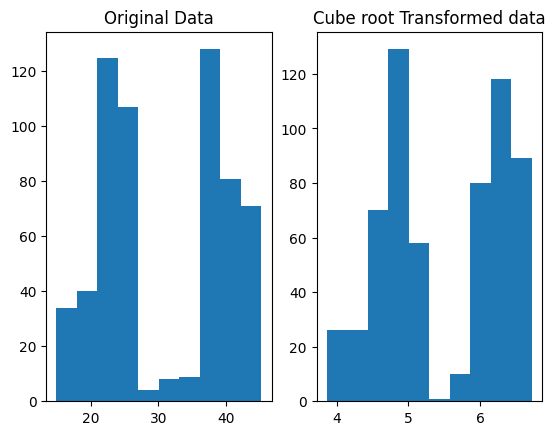

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(y1)
axs[1].hist(y)

axs[0].set_title('Original Data')
axs[1].set_title('Cube root Transformed data')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       607 non-null    object 
 1   Open       607 non-null    float64
 2   High       607 non-null    float64
 3   Low        607 non-null    float64
 4   Close      607 non-null    float64
 5   Adj Close  607 non-null    float64
 6   Volume     607 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 33.3+ KB


In [14]:
data['Open'] = data['Open'].astype(int)
data['Close'] = data['Close'].astype(int)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       607 non-null    object 
 1   Open       607 non-null    int32  
 2   High       607 non-null    float64
 3   Low        607 non-null    float64
 4   Close      607 non-null    int32  
 5   Adj Close  607 non-null    float64
 6   Volume     607 non-null    int64  
dtypes: float64(3), int32(2), int64(1), object(1)
memory usage: 28.6+ KB


In [29]:
# Dependent variable Y
y = np.log(data['Close'])
errors = y - np.mean(y)
err_varnc = np.var(errors)
weights = 1/err_varnc
weights


#Open + Volume = independent variables X
x = data[['Open','Volume']]

x = sm.add_constant(x)
y_model_w = sm.WLS(y,x, weights=weights)


In [30]:
results = y_model_w.fit()

In [37]:
y_pred = results.predict(x)

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.996
Model:                            WLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 7.723e+04
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:04:15   Log-Likelihood:                -513.49
No. Observations:                 607   AIC:                             1033.
Df Residuals:                     604   BIC:                             1046.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0494      0.142     -0.347      0.729      -0.329       0.230
Open           0.9998      0.003    297.508      0.000       0.993       1.006
Volume      1.495e-09   4.47e-09      0.335      0.738   -7.28e-09    1.03e-08
==============================================================================
Omnibus:                        5.051   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                6.467
Skew:                          -0.031   Prob(JB):                       0.0394
Kurtosis:                       3.502   Cond. No.                     8.14e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.14e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Cube root Transformed data')

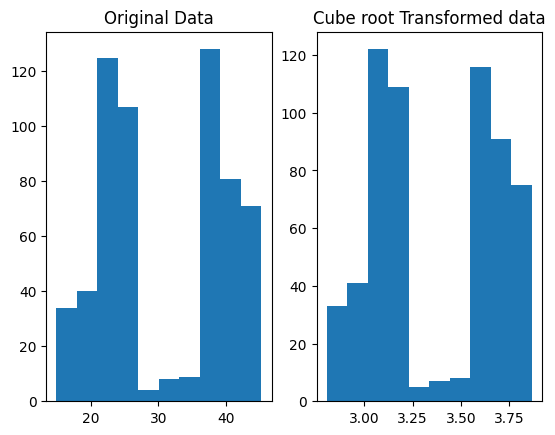

In [38]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(y1)
axs[1].hist(y_pred)

axs[0].set_title('Original Data')
axs[1].set_title('Cube root Transformed data')